# Get Path 

In [2]:
# Get Directory Path
import os
os.getcwd()

'C:\\Users\\Yrelav\\Documents\\Capstone_project\\Peyton_penguins'

In [ ]:
os.chdir('C:\\Users\\peyto\\OneDrive\\Documents\\anaconda_projects\\Penguins Capstone\\Penguin Capstone Jupyter')
path = os.getcwd( )
path

# Data import and cleaning


In [14]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
## Load data with selected columns
raw_data = pd.read_csv('data/penguins_lter.csv', usecols=['Species', 'Culmen Length (mm)',
                                    'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'])
raw_data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0


In [16]:
# Get information about the data
print('The shape of the data is:  ', raw_data.shape)
print('Description of data:  ', raw_data.describe)
print('The data columns in raw data set:  ', raw_data.columns)
print('The data types are:  ', raw_data.dtypes)

The shape of the data is:   (344, 5)
Description of data:   <bound method NDFrame.describe of                                  Species  Culmen Length (mm)  \
0    Adelie Penguin (Pygoscelis adeliae)                39.1   
1    Adelie Penguin (Pygoscelis adeliae)                39.5   
2    Adelie Penguin (Pygoscelis adeliae)                40.3   
3    Adelie Penguin (Pygoscelis adeliae)                 NaN   
4    Adelie Penguin (Pygoscelis adeliae)                36.7   
..                                   ...                 ...   
339    Gentoo penguin (Pygoscelis papua)                 NaN   
340    Gentoo penguin (Pygoscelis papua)                46.8   
341    Gentoo penguin (Pygoscelis papua)                50.4   
342    Gentoo penguin (Pygoscelis papua)                45.2   
343    Gentoo penguin (Pygoscelis papua)                49.9   

     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  
0                 18.7                181.0         3750.0  
1              

In [17]:
## Check for missing data
raw_data.isna().sum()

Species                0
Culmen Length (mm)     2
Culmen Depth (mm)      2
Flipper Length (mm)    2
Body Mass (g)          2
dtype: int64

In [18]:
# Remove rows with missing data
raw_data = raw_data.dropna()
raw_data.isna().sum()

Species                0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
dtype: int64

# EDA: Exploratory Data Analysis


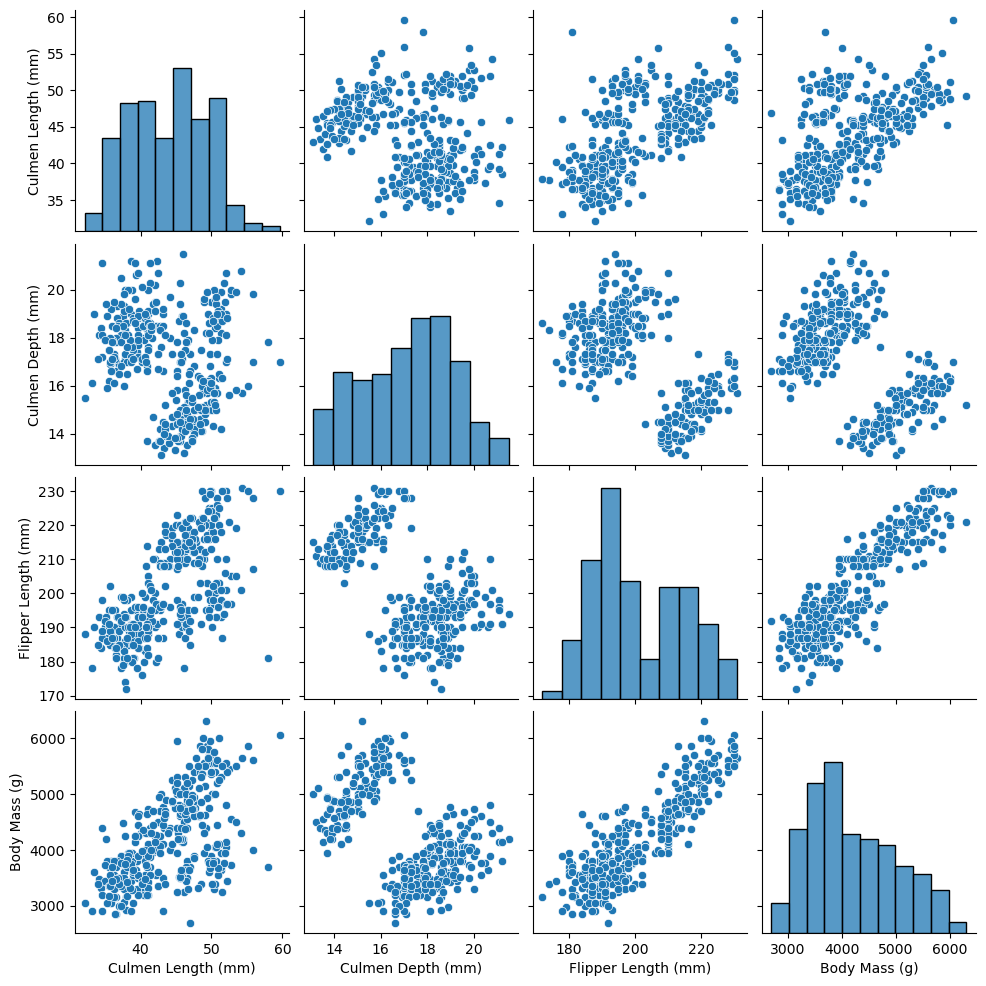

In [20]:
sns.pairplot(raw_data)
plt.show()

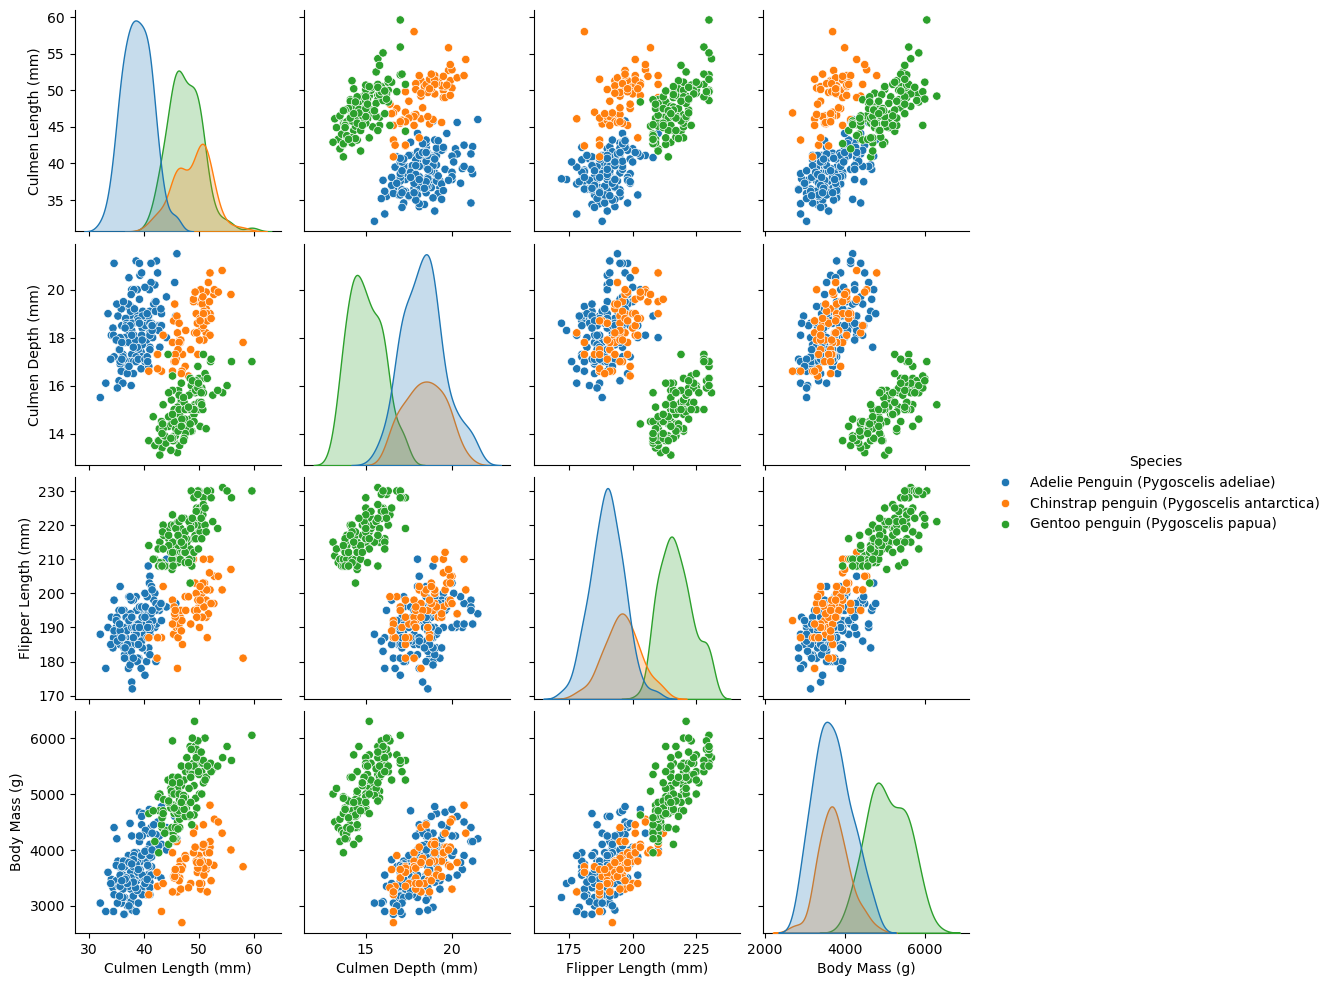

In [21]:
sns.pairplot(raw_data, hue='Species')
plt.show()

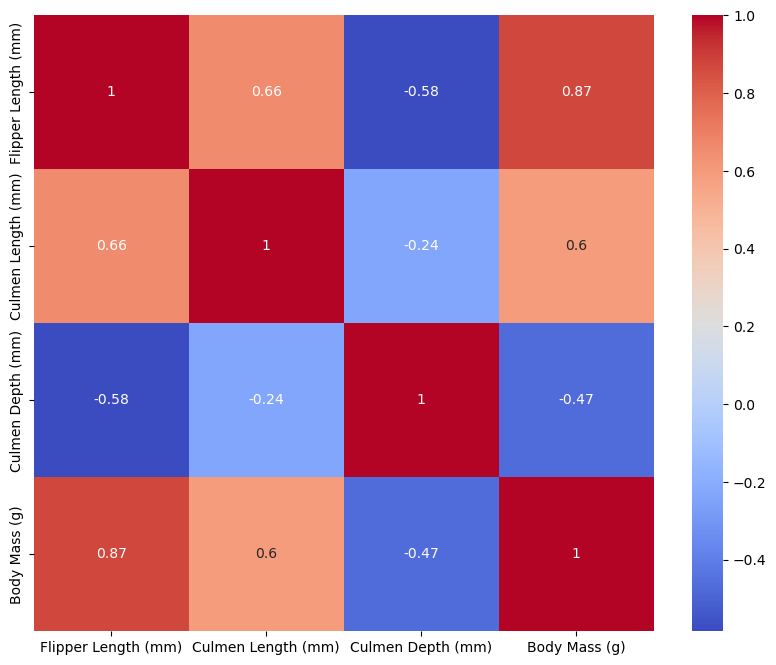

In [22]:
# Select only the numeric columns for correlation
corr_df = raw_data[['Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']]

# Calculate correlation matrix
correlation_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)
plt.show()

In [23]:
# Load the packages
from sklearn.model_selection import train_test_split
data = raw_data

In [24]:
# Split the data into test and train sets at 30:70 percent splits
features = ['Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']
X = raw_data[features] # Features
y = raw_data['Species'] # Target variable
print(X.shape)
print(y.shape)

(342, 4)
(342,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Shape of X_train:  ', X_train.shape)
print('Shape of X_test:  ', X_test.shape)
print('Shape of y_train:  ', y_train.shape)
print('Shape of y_test:  ', y_test.shape)

Shape of X_train:   (239, 4)
Shape of X_test:   (103, 4)
Shape of y_train:   (239,)
Shape of y_test:   (103,)


In [26]:
# import the packages
from sklearn.linear_model import LogisticRegression

# instantiate the model (using parameters for multiclass)
logreg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [27]:
#Create dataframe to compare
data = {'y_test': y_test, 'y_pred': y_pred}
test_pred = pd.DataFrame(data)
test_pred.head()

,y_test,y_pred
238,Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua)
117,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
114,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
43,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
127,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
